# badminton strokes namely forehand and backhand prediction 

### Importing Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,accuracy_score

### Reading the data

In [14]:
data = pd.read_excel('Complete CSV Data.xlsx')
data.head()

,Accelerometer_1 X axis,Accelerometer_1 Y axis,Accelerometer_1 Z axis,Gyroscope_1 X axis,Gyroscope_1 Y axis,Gyroscope_1 Z axis,Accelerometer_2 X axis,Accelerometer_2 Y axis,Accelerometer_2 Z axis,Gyroscope2_X axis,Gyroscope2_Y axis,Gyroscope2_Z axis,Class
0,0.21,0.93,0.14,3.96,0.93,3.64,0.46,0.13,3.44,3.94,2.98,1.64,0
1,0.02,0.96,0.12,3.96,0.99,3.48,0.68,3.71,0.14,3.94,2.93,1.38,0
2,3.90,0.96,3.99,3.96,1.06,3.44,0.73,3.68,0.38,3.94,3.08,1.29,0
3,3.80,0.96,3.85,3.96,1.16,3.42,0.51,3.98,0.85,3.94,2.93,1.20,0
4,3.73,0.89,3.67,3.96,1.03,3.44,0.46,3.72,0.72,3.94,3.14,1.19,0


### Exploratory data analysis

In [15]:
# let's check if there us any missing values in the dataset
data.isnull().sum()

 Accelerometer_1 X axis    0
 Accelerometer_1 Y axis    0
 Accelerometer_1 Z axis    0
Gyroscope_1 X axis         0
Gyroscope_1 Y axis         0
Gyroscope_1 Z axis         0
 Accelerometer_2 X axis    0
 Accelerometer_2 Y axis    0
 Accelerometer_2 Z axis    0
Gyroscope2_X axis          0
Gyroscope2_Y axis          0
Gyroscope2_Z axis          0
Class                      0
dtype: int64

In [16]:
data.dropna(inplace = True)

In [17]:
data.isnull().sum()

 Accelerometer_1 X axis    0
 Accelerometer_1 Y axis    0
 Accelerometer_1 Z axis    0
Gyroscope_1 X axis         0
Gyroscope_1 Y axis         0
Gyroscope_1 Z axis         0
 Accelerometer_2 X axis    0
 Accelerometer_2 Y axis    0
 Accelerometer_2 Z axis    0
Gyroscope2_X axis          0
Gyroscope2_Y axis          0
Gyroscope2_Z axis          0
Class                      0
dtype: int64

there is no missing values in the dataset

<AxesSubplot:>

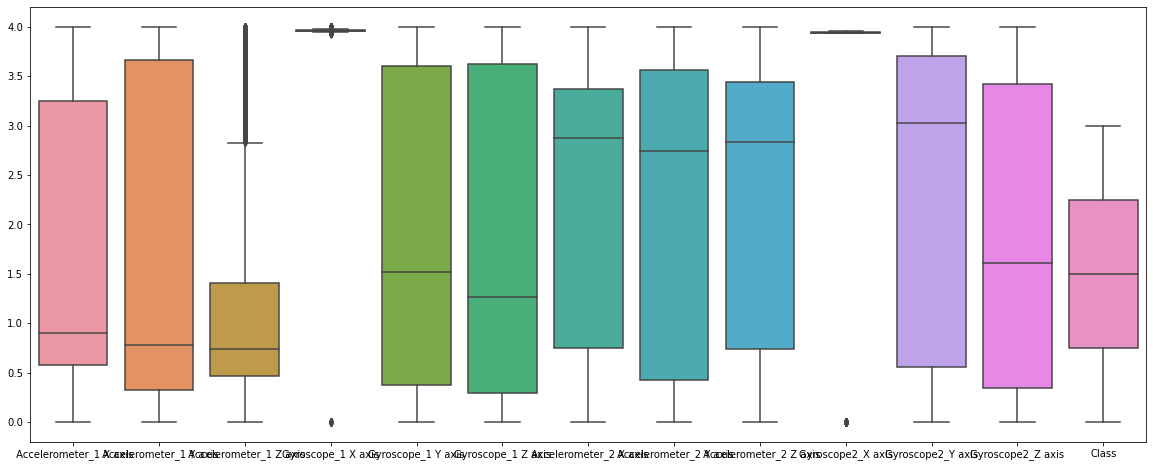

In [18]:
# lets draw the outliers from our data using box plots
plt.figure(figsize=(20,8))
sns.boxplot(data=data)

We detected some outliers but we will not remove them, the purpose of this analysis was just to know if we have any outliers

In [19]:
# statistical information of the data
data.info

<bound method DataFrame.info of        Accelerometer_1 X axis   Accelerometer_1 Y axis  \
0                        0.21                     0.93   
1                        0.02                     0.96   
2                        3.90                     0.96   
3                        3.80                     0.96   
4                        3.73                     0.89   
...                       ...                      ...   
9995                     0.82                     3.47   
9996                     0.79                     3.50   
9997                     0.75                     3.48   
9998                     0.74                     3.48   
9999                     0.75                     3.50   

       Accelerometer_1 Z axis  Gyroscope_1 X axis  Gyroscope_1 Y axis  \
0                        0.14                3.96                0.93   
1                        0.12                3.96                0.99   
2                        3.99                3.96   

In [20]:
data['Class'].unique()

array([0, 1, 2, 3], dtype=int64)

- the class feature have values (forehand and backhand)
- we have to convert these values into numberical values
- because machine learning models don't understand categorical values

In [21]:
# # creating a dict file 
# Class = {'forehand': 1,'backhand': 0}
# # traversing through dataframe
# data.Class = [Class[item] for item in data.Class]
# data.head()

#### Split the data

this is the process where we will split the data into test and train sets
- train data will be used to train the model
- test data will be used to test the model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

### Machine learning 
we will train the following machine learning classification models
- Logistic Regression
- Decision Tree Classifiers
- Random Forests
- Support Vector Machines
- K-Nearest Neighbors
- Gaussian Naive Bayes
- LinearDiscriminantAnalysis

In [29]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'),
        recall_score(y_test, y_pred,pos_label='positive',
                                           average='micro'),
        f1_score(y_test, y_pred,pos_label='positive',
                                           average='micro'),
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [30]:
# the model list
models_list = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               GaussianNB(),LinearDiscriminantAnalysis()
               ]

In [31]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'bina

Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Completed RandomForestClassifier model's performance assessment.
Training SVC model...
Completed SVC model training.


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Completed SVC model's performance assessment.
Training KNeighborsClassifier model...
Completed KNeighborsClassifier model training.


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to

Completed KNeighborsClassifier model's performance assessment.
Training GaussianNB model...
Completed GaussianNB model training.
Completed GaussianNB model's performance assessment.
Training LinearDiscriminantAnalysis model...
Completed LinearDiscriminantAnalysis model training.
Completed LinearDiscriminantAnalysis model's performance assessment.


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [32]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,LogisticRegression,0.589625,0.5695,0.5695,0.5695,0.5695
1,DecisionTreeClassifier,1.000000,0.8650,0.8650,0.8650,0.8650
2,RandomForestClassifier,1.000000,0.9445,0.9445,0.9445,0.9445
3,SVC,0.803250,0.7785,0.7785,0.7785,0.7785
4,KNeighborsClassifier,0.899125,0.8255,0.8255,0.8255,0.8255
5,GaussianNB,0.560250,0.5520,0.5520,0.5520,0.5520
6,LinearDiscriminantAnalysis,0.580875,0.5660,0.5660,0.5660,0.5660


From the above table, we can see that 
- Random Forest performed very well by giving accuracy of 90% on testing data
- we will now use parameters tuning to train Random Forest 

#### Tuning the RandomForestClassifier Model

In [33]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]}

In [34]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [35]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [36]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 100}


0.631 + or -0.026 for the {'max_depth': 2, 'n_estimators': 5}
0.692 + or -0.008 for the {'max_depth': 2, 'n_estimators': 10}
0.72 + or -0.023 for the {'max_depth': 2, 'n_estimators': 50}
0.721 + or -0.014 for the {'max_depth': 2, 'n_estimators': 100}
0.725 + or -0.011 for the {'max_depth': 2, 'n_estimators': 250}
0.728 + or -0.016 for the {'max_depth': 4, 'n_estimators': 5}
0.773 + or -0.012 for the {'max_depth': 4, 'n_estimators': 10}
0.795 + or -0.013 for the {'max_depth': 4, 'n_estimators': 50}
0.806 + or -0.009 for the {'max_depth': 4, 'n_estimators': 100}
0.812 + or -0.006 for the {'max_depth': 4, 'n_estimators': 250}
0.865 + or -0.016 for the {'max_depth': 8, 'n_estimators': 5}
0.888 + or -0.01 for the {'max_depth': 8, 'n_estimators': 10}
0.898 + or -0.01 for the {'max_depth': 8, 'n_estimators': 50}
0.9 + or -0.008 for the {'max_depth': 8, 'n_estimators': 100}
0.899 + or -0.007 for the {'max_depth': 8, 'n_estimators': 

In [42]:
model = cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print('Recall: ', recall_score(y_test, y_pred, pos_label='positive', average='micro'))
print('f1-score: ', f1_score(y_test, y_pred, pos_label='positive', average='micro'))

Accuracy:  0.9395
Precision:  0.9395
Recall:  0.9395
f1-score:  0.9395


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [44]:
df1_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])

def get_perf_metrics_t(model):
    model = cv.best_estimator_
    model_name =RandomForestClassifier()
    
    print('Training RandomForestClassifier()')
    model.fit(X_train, y_train)
    print('Completed RandomForestClassifier()')
    y_pred = model.predict(X_test)
    
    df1_perf_metrics.loc[0] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred, pos_label='positive', average='micro'),
        recall_score(y_test, y_pred, pos_label='positive', average='micro'),
        f1_score(y_test, y_pred, pos_label='positive', average='micro'),
    ]
    
    print("Completed RandomForestClassifier() model's performance assessment.")

get_perf_metrics_t(model)

Training RandomForestClassifier()
Completed RandomForestClassifier()
Completed RandomForestClassifier() model's performance assessment.


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [45]:
df1_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,RandomForestClassifier(),1.0,0.942,0.942,0.942,0.942


In [46]:
# lets perform predictions on testing data
pred = model.predict(X_test)
pred

array([3, 0, 0, ..., 3, 1, 2], dtype=int64)

#### Prediction on test dataset

- we will import test dataset having no class feature
- we will feed it to the model for testing

In [48]:
test = pd.read_csv('test.csv')
test.head()

,Accelerometer_1 X axis,Accelerometer_1 Y axis,Accelerometer_1 Z axis,Gyroscope_1 X axis,Gyroscope_1 Y axis,Gyroscope_1 Z axis,Accelerometer_2 X axis,Accelerometer_2 Y axis,Accelerometer_2 Z axis,Gyroscope2_X axis,Gyroscope2_Y axis,Gyroscope2_Z axis
0,0.21,0.93,0.14,3.96,0.93,3.64,0.46,0.13,3.44,3.94,2.98,1.64
1,0.02,0.96,0.12,3.96,0.99,3.48,0.68,3.71,0.14,3.94,2.93,1.38
2,3.90,0.96,3.99,3.96,1.06,3.44,0.73,3.68,0.38,3.94,3.08,1.29
3,3.80,0.96,3.85,3.96,1.16,3.42,0.51,3.98,0.85,3.94,2.93,1.20
4,3.73,0.89,3.67,3.96,1.03,3.44,0.46,3.72,0.72,3.94,3.14,1.19


In [49]:
model.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,